In [2]:
# 划分训练集、验证集
import torch
import numpy as np
from config import config
from data_process import file2list,split_pretrain_data
import os
print(1)
split_pretrain_data(file2list(config.alldata_list))

KeyboardInterrupt: 

In [ ]:
print(1)

1


In [ ]:
# dataset、loss
from dataset import ECGDatasetForPreTrain
from config import config
import os
from torch.utils.data import DataLoader
import torch
from torch import nn
import utils
c = utils.MSE
a = torch.rand(2,10)
b = torch.rand(2,10)
sum = 0
for j in range(2):
    for i in range(10):
        sum+=(a[j,i]-b[j,i])*(a[j,i]-b[j,i])
print(sum/20)
loss_f = nn.MSELoss(reduce=False,size_average=False)
c = loss_f(a,b)
print(c)
sumc = 0
print(c.sum()/20)
for j in range(2):
    for i in range(10):
        sumc+= c[j,i]

tensor(0.1822)
tensor([[9.6100e-02, 4.9503e-01, 4.9091e-01, 4.4750e-01, 4.7866e-03, 1.0697e-01,
         4.2309e-02, 4.7182e-02, 1.7466e-01, 1.9694e-01],
        [1.2707e-02, 1.5666e-01, 3.5095e-02, 2.0940e-03, 5.0111e-01, 2.7105e-04,
         8.2687e-02, 4.8588e-01, 2.5855e-01, 6.7935e-03]])
tensor(0.1822)


D:\Environment\Anaconda\envs\ECG_wave\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


In [ ]:
from dataset import segment_dataset,ECGDatasetForPreTrain
from torch.utils.data import DataLoader
from config import config
# train_dataset = ECGDatasetForPreTrain(data_path=config.pretrain_train_list)
train_dataset = segment_dataset(file_dir=config.segment_train_dir)
print(train_dataset.__getitem__(1))
train_dataloader = DataLoader(train_dataset,batch_size=config.batch_size,shuffle=True,num_workers=6 if config.onserver else 1)


(tensor([[0.0080, 0.0388, 0.0221,  ..., 0.1622, 0.0937, 0.1317]],
       dtype=torch.float64), tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 1., 1., 1.]], dtype=torch.float64))


In [ ]:
from data_process import generate_mean_mask_index
from config import config
import torch
import numpy as np
from models.vit_1D import ViT1D
from models.mae_1D import MAE
import os
import data_process
v = ViT1D(signal_lenth = config.input_signal_len,patch_lenth = config.vit_patch_length, num_classes = 1000, dim = config.vit_dim,depth = config.vit_depth,heads = config.vit_heads,mlp_dim=config.vit_mlp_dim)
model = MAE(encoder = v,masking_ratio = config.mae_masking_ratio,masking_method=config.mae_masking_method,decoder_dim = config.mae_decoder_dim,decoder_depth= config.mae_decoder_depth,decoder_heads=config.mae_decoder_heads,decoder_dim_head= config.mae_decoder_dim_head)
model.load_state_dict(torch.load('ckpt_pretrain/mae_1D_202203150419_v1_lr0.0001_st16to24_bsz64_datastand_False_mean/best_w.pth',map_location='cpu')['state_dict'])
a = np.load(os.path.join(config.data_dir,'200324000010.xml.npy'))
a = a[[1],:]
a = a.astype(np.float32)
a = data_process.resample(a[0],len(a[0]) * 250 // 500)
a = torch.tensor(a, dtype=torch.float32)
a = torch.unsqueeze(a,dim=0)

tensor(4612.0718, grad_fn=<DivBackward0>)


D:\Environment\Anaconda\envs\ECG_wave\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [ ]:
from config import config
import os
import numpy as np
import tqdm
from data_process import file2list,list2file
import matplotlib.pyplot as plt
sum = 0
sum_error = 0
data_list = file2list(config.alldata_list)
error_list = []
new_list = []
# data = np.load(os.path.join(config.data_dir,'1666874.xml.npy'))[1]
# print(np.std(data))
# print(np.mean(data))
import warnings
warnings.filterwarnings('error')
for data_name in tqdm.tqdm(data_list):
    data_name = data_name.strip()
    data = np.load(os.path.join(config.data_dir,data_name))[1]

    if not np.std(data) == 0:
        new_list.append(data_name)
print(len(new_list))
print(len(data_list))
list2file(new_list,'D:/Project/MAE_ECG/data/sc_data_list_one.txt')
print(sum)

100%|██████████| 121158/121158 [06:18<00:00, 319.95it/s]


121055
121158
0


In [ ]:
from data_process import generate_mean_mask_index
import torch
m,u = generate_mean_mask_index(batch = 200,mask_radio=0.6,num_patches=250,device='cpu')
print(m.shape)
print(m[0])
print(u.shape)
print(u[0])

# mask_radio = 0.6
# mask_num = mask_radio*10

torch.Size([200, 150])
tensor([  0,   1,   2,   3,   4,   5,  10,  11,  12,  13,  14,  15,  20,  21,
         22,  23,  24,  25,  30,  31,  32,  33,  34,  35,  40,  41,  42,  43,
         44,  45,  50,  51,  52,  53,  54,  55,  60,  61,  62,  63,  64,  65,
         70,  71,  72,  73,  74,  75,  80,  81,  82,  83,  84,  85,  90,  91,
         92,  93,  94,  95, 100, 101, 102, 103, 104, 105, 110, 111, 112, 113,
        114, 115, 120, 121, 122, 123, 124, 125, 130, 131, 132, 133, 134, 135,
        140, 141, 142, 143, 144, 145, 150, 151, 152, 153, 154, 155, 160, 161,
        162, 163, 164, 165, 170, 171, 172, 173, 174, 175, 180, 181, 182, 183,
        184, 185, 190, 191, 192, 193, 194, 195, 200, 201, 202, 203, 204, 205,
        210, 211, 212, 213, 214, 215, 220, 221, 222, 223, 224, 225, 230, 231,
        232, 233, 234, 235, 240, 241, 242, 243, 244, 245])
torch.Size([200, 100])
tensor([  6,   7,   8,   9,  16,  17,  18,  19,  26,  27,  28,  29,  36,  37,
         38,  39,  46,  47,  48,  49,

In [ ]:
print(1)

1


/root/miniconda3/envs/ECG/lib/python3.7/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


tensor(10.6766)


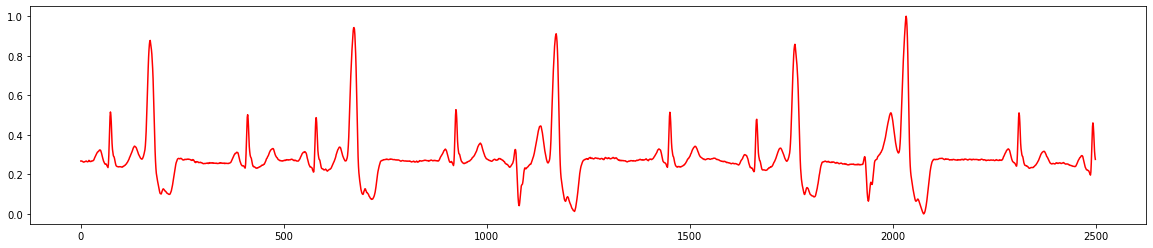

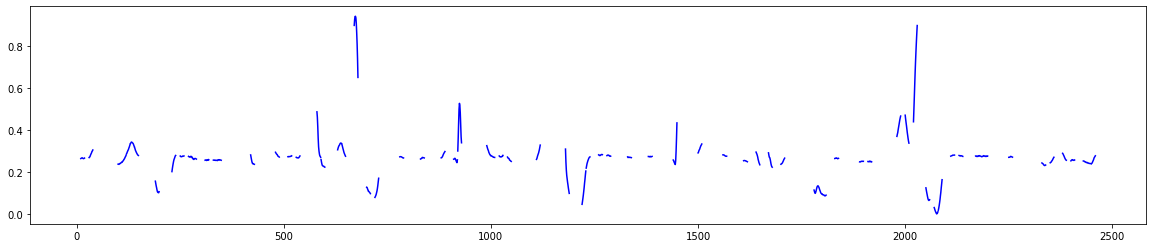

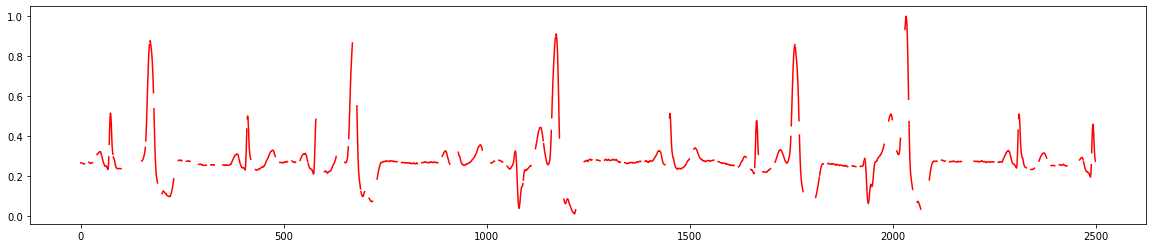

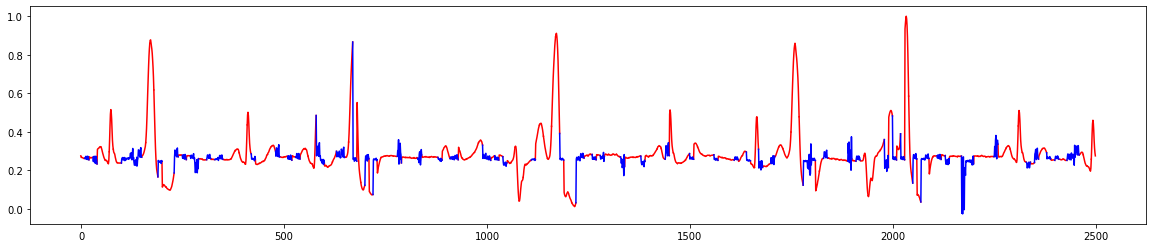

In [ ]:
from data_process import generate_mean_mask_index
from config import config
import torch
import numpy as np
from models.vit_1D import ViT1D

from models.mae_1D_conv import MAE_conv
from models.mae_1D import MAE
from models.mae_1D_linearmask import MAE_linearmask
import os
import data_process
import matplotlib.pyplot as plt
from data_process import name2index,file2index,file2list,list2file
data_path = '/home/ECG_AI/shuchuang/data/20210519_120000'
# data_path = 'D://Project/ECG_neo4j/ECG_AI/data/Total12W'
label_path = os.path.join(data_path,'labels_v10_alllabel.txt')
arrthmia = os.path.join(data_path,'arrythmia_ori_v2.txt')
# ckpt_path = 'ckpt/mae_1D_202203160714_v2_lr0.0003_st16to24_bsz256_datastand_True_mean_mr0.6'
# ckpt_path = 'ckpt/mae_1D_conv_202203221226_v2mae_1D_conv__lr0.0003_st16to24_bsz256_datastand_True_mean_mr0.3'
# ckpt_path = 'ckpt_pretrain/mae_1D_202203240444_v2mae_1D__lr0.0003_st16to24_bsz256_datastand_True_mean_mr0.3'
ckpt_path = 'ckpt_pretrain/mae_1D_normalization_202203300654_v2mae_1D_normalization__lr0.0003_st16to24_bsz256_datastand_True_mean_mr0.3'
# ckpt_path = 'ckpt_pretrain/mae_1D_linearmask_202203310542_v2_lr0.0003_st16to24_bsz256_datastand_True_mean_mr0.3'
# ckpt_path = 'ckpt_pretrain/mae_1D_linearmask_202204050638_v2_lr0.0003_st16to24_bsz256_datastand_True_random_mr0.3'
# ckpt_path = 'ckpt_pretrain/mae_1D_linearmask_202204050750_v2_lr0.0003_st16to24_bsz256_datastand_True_random_mr0.6'
tensor_save_path = os.path.join(ckpt_path,'tensor')
if not os.path.exists(tensor_save_path):
    os.makedirs(tensor_save_path)

name2idx = name2index(arrthmia)

model = MAE()
# v_conv = ViT1D_conv(signal_lenth = config.input_signal_len,patch_lenth = config.vit_patch_length, num_classes = 1000, dim = config.vit_dim,depth = config.vit_depth,heads = config.vit_heads,mlp_dim=config.vit_mlp_dim,dim_head=config.vit_dim_head)
# model = MAE_conv(encoder = v_conv,vit_dim=config.vit_dim,masking_ratio = config.mae_masking_ratio,masking_method=config.mae_masking_method,decoder_dim = config.mae_decoder_dim,decoder_depth= config.mae_decoder_depth,decoder_heads=config.mae_decoder_heads,decoder_dim_head= config.mae_decoder_dim_head)
# model = MAE_linearmask()
model.eval()

# 选择画图心电图
file2idx = file2index(label_path, name2idx)
target_label = '室性早搏'
figure_dir = os.path.join(ckpt_path,'figure')
if not os.path.exists(figure_dir):
    os.mkdir(figure_dir)
file_list = file2list(os.path.join(figure_dir,'file_list.txt'))

for file,label in file2idx.items():
    if name2idx[target_label] in label and file not in file_list:
        file_name = file
        file_list.append(file)
        break
list2file(file_list,os.path.join(figure_dir,'file_list.txt'))
file_name = file_name+'.npy'
# file_name = '1657599.xml.npy'
figure_save_dir = os.path.join(figure_dir,file_name+target_label)
# 选择画图心电图


model.load_state_dict(torch.load(os.path.join(ckpt_path,'best_w.pth'),map_location='cpu')['state_dict'])
a = np.load(os.path.join(config.data_dir,file_name))
a = a[[1],:]
# a = (a - np.min(a))/(np.max(a)-np.min(a)) # 普通归一化时使用
a = (a-np.mean(a))/np.std(a) # z-score 归一化时使用
a = a.astype(np.float32)
a = data_process.resample(a[0],len(a[0]) * 250 // 500)
a = torch.tensor(a, dtype=torch.float32)
a = torch.unsqueeze(a,dim=0)

with torch.no_grad():
    b = model(a,save_path = tensor_save_path,file_name = file_name)
    print(b)

patches = torch.load(os.path.join(tensor_save_path,file_name+'_patches.pt')).detach().squeeze().numpy()
unmasked_indices = torch.load(os.path.join(tensor_save_path,file_name+'_unmasked_indices.pt')).detach().squeeze().numpy()
masked_indices = torch.load(os.path.join(tensor_save_path,file_name+'_masked_indices.pt')).detach().squeeze().numpy()
pred_pixel  = torch.load(os.path.join(tensor_save_path,file_name+'_pred_pixel.pt')).detach().squeeze().numpy()

patch_size = patches.shape[1]
p_flatten = patches.flatten()


plt.figure(figsize=(20,4))
plt.title = 'ori'
plt.plot(p_flatten,'red',label = 'ori')

if not os.path.exists(figure_save_dir):
    os.makedirs(figure_save_dir)

plt.savefig(os.path.join(figure_save_dir,'ori.jpg'))
plt.figure(figsize=(20,4))
for i in range(patches.shape[0]):
    if i in masked_indices:
        x_axios = range(i*patch_size,i*patch_size+10)
        plt.plot(x_axios,p_flatten[x_axios],'blue')
plt.savefig(os.path.join(figure_save_dir,'masked.jpg'))

for ind,i in enumerate(masked_indices):
    for j in range(patch_size):
        p_flatten[i*patch_size+j] = pred_pixel[ind,j]
plt.figure(figsize=(20,4))
for i in range(patches.shape[0]):
    if i in unmasked_indices:
        x_axios = range(i*patch_size,i*patch_size+10)
        plt.plot(x_axios,p_flatten[x_axios],'red')
plt.savefig(os.path.join(figure_save_dir,'unmasked.jpg'))

plt.figure(figsize=(20,4))
for i in range(patches.shape[0]):
    if i in unmasked_indices:
        x_axios = range(i*patch_size-1,i*patch_size+10)
        plt.plot(x_axios,p_flatten[x_axios],'red')
for i in range(patches.shape[0]):
    if i in masked_indices:
        x_axios = range(i*patch_size-1,i*patch_size+10)
        plt.plot(x_axios,p_flatten[x_axios],'blue')
plt.savefig(os.path.join(figure_save_dir,'cat.jpg'))

In [ ]:
from config import config
import torch
import numpy as np
from models.mae_1D_linearmask import MAE_linearmask
from models.ECG_mae_segmentation import ECG_mae_segmentation
import os
import data_process
import matplotlib.pyplot as plt
from data_process import name2index,file2index,file2list,list2file
ckpt_path = 'ckpt_pretrain/mae_1D_linearmask_202204050638_v2_lr0.0003_st16to24_bsz256_datastand_True_random_mr0.3'
pre_train_model = MAE_linearmask(pre_train=False)
pre_train_model.eval()
pre_train_model.load_state_dict(torch.load(os.path.join(ckpt_path,'best_w.pth'),map_location='cuda')['state_dict'])
model = ECG_mae_segmentation(pre_train_model,4)
file_name = '1657599.xml.npy'
a = np.load(os.path.join(config.data_dir,file_name))
a = a[[1],:]
# a = (a - np.min(a))/(np.max(a)-np.min(a)) # 归一化时使用
a = (a-np.mean(a))/np.std(a) # z-score 归一化时使用
a = a.astype(np.float32)
a = data_process.resample(a[0],len(a[0]) * 240 // 500)
a = torch.tensor(a, dtype=torch.float32)
a = torch.unsqueeze(a,dim=0)
model(a)

decodere_tokens:torch.Size([1, 250, 5])
upsample_1:torch.Size([1, 4, 500])
upsample_2:torch.Size([1, 4, 2500])
out:torch.Size([1, 4, 2500])


0

In [ ]:
from config import config
from dataset import segment_dataset
dataset = segment_dataset(config.segment_train_dir)
print(dataset(0))

tensor([[[0.2341, 0.2761, 0.9141, 0.7386],
         [0.2807, 0.5106, 0.8875, 0.2179],
         [0.0578, 0.4544, 0.0243, 0.2807]],

        [[0.9465, 0.8554, 0.7298, 0.0739],
         [0.7894, 0.8792, 0.6835, 0.6126],
         [0.3085, 0.1216, 0.9634, 0.8098]]])
tensor([[[0.2341, 0.2807, 0.0578],
         [0.2761, 0.5106, 0.4544],
         [0.9141, 0.8875, 0.0243],
         [0.7386, 0.2179, 0.2807]],

        [[0.9465, 0.7894, 0.3085],
         [0.8554, 0.8792, 0.1216],
         [0.7298, 0.6835, 0.9634],
         [0.0739, 0.6126, 0.8098]]])


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
ctdata_path = '/home/ECG_AI/xintiao/data/U-net/240Hz/all/baselinedriftV2/val'
data_list = os.listdir(ctdata_path)
data_1 = np.load(os.path.join(ctdata_path,data_list[0]))
data_2 = np.load(os.path.join(ctdata_path,data_list[1]))

AttributeError: 'str' object has no attribute 'shape'

In [ ]:
import numpy as np
p_dict = [0] * 4
r_dict = [0] * 4    
p_sum_dict = [0] * 4
r_sum_dict = [0] * 4
y_pred = [[0,0,1,0],[1,1,0,0],[0,0,1,0],[1,1,1,0]]
y = [[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]]

y = np.argmax(y,axis=1)
print(y)

for i in range(len(r_dict)):
    r_dict[i] += np.sum((y == y_pred) & (y == i))
    p_dict[i] += np.sum((y == y_pred) & (y_pred == i))
    r_sum_dict[i] += np.sum(y == i)
    p_sum_dict[i] += np.sum(y_pred == i)
keys = ['bg', 'p', 'r', 't']
all_pi = []
all_ri = []
for i in range(len(r_dict)):
    pi = np.sum(p_dict[i]) / np.sum(p_sum_dict[i])
    # print("%s-p" % keys[i], np.sum(p_dict[i]), '/', np.sum(p_sum_dict[i]), "=", pi)
    ri = np.sum(r_dict[i]) / np.sum(r_sum_dict[i])
    # print("*%s-r" % keys[i], np.sum(r_dict[i]), '/', np.sum(r_sum_dict[i]), "=", ri)
    all_pi.append(pi)
    all_ri.append(ri)


[0 0 0 0]


/root/miniconda3/envs/ECG/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/root/miniconda3/envs/ECG/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


(3, 21600002)


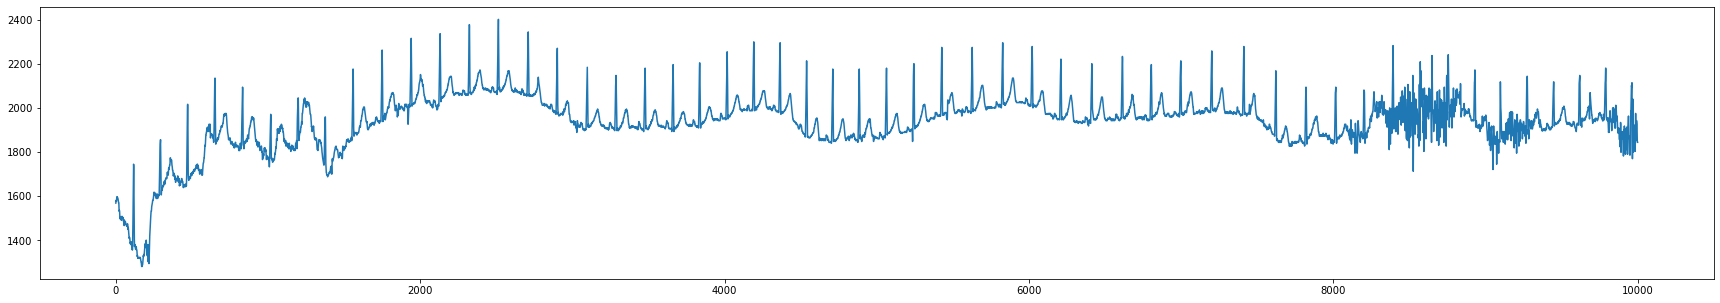

In [ ]:
# bisha py
import os
import BiSha3 as bs
import numpy as np
import matplotlib.pyplot as plt
data_dir = '/Users/songpeidong/Documents/Data/数创动态/示例数据_66395/107'
data_name = os.listdir(data_dir)[0]
data_path = os.path.join(data_dir,data_name)
Reader = bs.Read_datafiles()
data = Reader.readRaw(data_path,0)
print(data.shape)
lead1 = data[0]
plt.figure(figsize=(30,5))
plt.plot(lead1[10000:20000])

In [ ]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from config import config
transform_train = transforms.Compose([
        transforms.RandomResizedCrop(256, scale=(0.2, 1.0), interpolation=3),  # 3 is bicubic
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    
train_dataset = datasets.ImageFolder(config.image_val_data_path, transform=transform_train)
train_dataloader = DataLoader(train_dataset,batch_size=256,shuffle=True,num_workers=6 if config.onserver else 1)
for inputs in train_dataloader:
    # print(inputs[0])
    print(inputs[0].shape)
    # print(inputs[1])
    print(inputs[1].shape)
    break


torch.Size([256, 3, 256, 256])
torch.Size([256])


MAE 2D with pixel reconstruction


/tmp/ipykernel_741/2940207770.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(img)


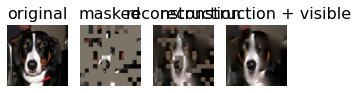

In [ ]:
# mae2d画图
from requests import request
import torch
from models import models_mae
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
import requests
imagenet_mean = np.array([0.485, 0.456, 0.406])
imagenet_std = np.array([0.229, 0.224, 0.225])

def show_image(image, title=''):
    # image is [H, W, 3]
    assert image.shape[2] == 3
    plt.imshow(torch.clip((image * imagenet_std + imagenet_mean) * 255, 0, 255).int())
    plt.title(title, fontsize=16)
    plt.axis('off')
    return
def run_one_image(img, model):
    x = torch.tensor(img)

    # make it a batch-like
    x = x.unsqueeze(dim=0)
    x = torch.einsum('nhwc->nchw', x)

    # run MAE
    loss, y, mask = model(x.float(), mask_ratio=0.75)
    y = model.unpatchify(y)
    y = torch.einsum('nchw->nhwc', y).detach().cpu()

    # visualize the mask
    mask = mask.detach()
    mask = mask.unsqueeze(-1).repeat(1, 1, model.patch_embed.patch_size[0]**2 *3)  # (N, H*W, p*p*3)
    mask = model.unpatchify(mask)  # 1 is removing, 0 is keeping
    mask = torch.einsum('nchw->nhwc', mask).detach().cpu()
    
    x = torch.einsum('nchw->nhwc', x)

    # masked image
    im_masked = x * (1 - mask)

    # MAE reconstruction pasted with visible patches
    im_paste = x * (1 - mask) + y * mask

    # make the plt figure larger
    plt.rcParams['figure.figsize'] = [24, 24]

    plt.subplot(1, 4, 1)
    show_image(x[0], "original")

    plt.subplot(1, 4, 2)
    show_image(im_masked[0], "masked")

    plt.subplot(1, 4, 3)
    show_image(y[0], "reconstruction")

    plt.subplot(1, 4, 4)
    show_image(im_paste[0], "reconstruction + visible")

    plt.show()
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = 'cpu'
model = models_mae.mae_vit_base_patch16()
model = model.to(device)
state = torch.load('ckpt_pretrain/mae_2D_fb_202207261043_v2_pl48_lr0.001_st16to24_bsz128_datastand_True_random0.75_fs240Hz_linearpos/best_w.pth',map_location='cpu')
model.load_state_dict(state['state_dict'])
image_path = '/mnt/data/MAE_2D/val/n02107908/n02107908_1030.JPEG'
img = Image.open(image_path)
img = img.resize((224,224))
img = np.array(img)/255.
assert img.shape ==(224,224,3)
img = img-imagenet_mean
img = img/imagenet_std
img = torch.tensor(img)
plt.rcParams['figure.figsize'] = [5, 5]
show_image(img)
img = img.to(device)
print("MAE 2D with pixel reconstruction")
run_one_image(img,model)

In [11]:
#MAE2D->1D
import os
import numpy as np
import torch
from PIL import Image
import requests
from models import models_mae_2D,models_mae_1D
from config import config
import data_process
import matplotlib.pyplot as plt
device = 'cpu'
# model_2D = models_mae_2D.mae_vit_base_patch16()
model_1D = models_mae_1D.mae_vit_base_patch16()
imagenet_mean = np.array([0.485, 0.456, 0.406])
imagenet_std = np.array([0.229, 0.224, 0.225])
image_path = '/Users/songpeidong/Documents/Data//MAE_2D/val/n02107908/n02107908_1030.JPEG'
img = Image.open(image_path)
img = img.resize((224,224))
img = np.array(img)/255.
assert img.shape ==(224,224,3)
img = img-imagenet_mean
img = img/imagenet_std
img = torch.tensor(img)
img = img.to(device)
file_name = '1657599.xml.npy'
a = np.load(os.path.join(config.data_dir,file_name))
a = a[[1],:]
# a = (a - np.min(a))/(np.max(a)-np.min(a)) # 普通归一化时使用
a = (a-np.mean(a))/np.std(a) # z-score 归一化时使用
a = a.astype(np.float32)
a = data_process.resample(a[0],len(a[0]) * 250 // 500)
a = torch.tensor(a, dtype=torch.float32)
a = torch.unsqueeze(a,dim=0).unsqueeze(dim = 0)
print('ECG shape :{}'.format(a.shape))
x = torch.tensor(img)
x = x.unsqueeze(dim=0)
x = torch.einsum('nhwc->nchw', x)
print('image shape :{}'.format(x.shape))



# loss, y, mask = model_2D(x.float(), mask_ratio=0.75)
# y = model_2D.unpatchify(y)
# y = torch.einsum('nchw->nhwc', y).detach().cpu()

# 1D patch_embedding
# from models.models_mae_1D import PatchEmbed_1D
# pe = PatchEmbed_1D()
# xx = pe(a)
# print(xx.shape)

#1D test 
loss, yy, mask = model_1D(a)

# 1D pos_embed
# from util.pos_embed import get_1d_sincos_pos_embed
# bb = get_1d_sincos_pos_embed(10,20)
# print(bb)

#1D patchify
# xx = model_1D.patchify(a)
# print(xx.shape)

# bb = model_1D.unpatchify(xx)
# print(bb.shape)


ECG shape :torch.Size([1, 1, 2500])
image shape :torch.Size([1, 3, 224, 224])
torch.Size([1, 1, 2500])


/Users/songpeidong/opt/anaconda3/envs/MAE/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


tensor([[1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
         1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
         0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
         1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
         0., 0., 1., 1., 0., 1., 1., 1., 1., 0.]])


input signal :torch.Size([1, 1, 2400])
output signal :torch.Size([1, 1, 2400])


/Users/songpeidong/opt/anaconda3/envs/MAE/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


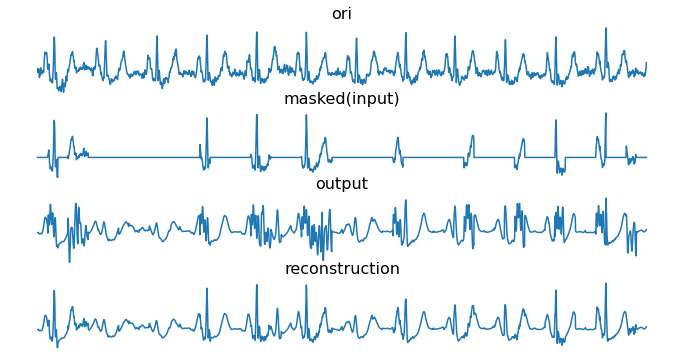

In [29]:
#models_mae_1d plot pl40 enc40dec20
import os
import numpy as np
import torch
from models import models_mae_2D,models_mae_1D
from config import config
import data_process
import matplotlib.pyplot as plt
def show_image(signal, title=''):
    # image is [H, W, 3]
    signal = signal.detach().numpy()
    plt.plot(signal[0])
    plt.title(title, fontsize=16)
    plt.axis('off')
    return
def run_one_signal(img, model):
    x = torch.tensor(img)

    # make it a batch-like
    x = x.unsqueeze(dim=0)
    print('input signal :{}'.format(x.shape))
    # run MAE
    loss, y, mask = model(x.float(), mask_ratio=0.75)
    y = model.unpatchify(y)
    print('output signal :{}'.format(y.shape))
    # visualize the mask
    mask = mask.detach()
    
    mask = mask.unsqueeze(-1).repeat(1, 1, model.patch_embed.patch_length)  # (N, H*W, p*p*3)
    mask = model.unpatchify(mask)  # 1 is removing, 0 is keeping

    # masked image
    im_masked = x * (1 - mask)
    # MAE reconstruction pasted with visible patches
    im_paste = x * (1 - mask) + y * mask

    # make the plt figure larger
    plt.rcParams['figure.figsize'] = [12, 6]
    plt.subplot(4, 1, 1)
    show_image(x[0],'ori')
    plt.subplot(4, 1, 2)
    show_image(im_masked[0],'masked(input)')
    plt.subplot(4, 1, 3)
    show_image(y[0],'output')
    plt.subplot(4, 1, 4)
    show_image(im_paste[0],'reconstruction')
    # plt.subplot(1, 4, 2)
    # show_image(im_masked[0], "masked")

    # plt.subplot(1, 4, 3)
    # show_image(y[0], "reconstruction")

    # plt.subplot(1, 4, 4)
    # show_image(im_paste[0], "reconstruction + visible")

    # plt.show()
device = 'cpu'
model_1D = models_mae_1D.mae_vit_signal_patch40()
model_1D.to(device)
state = torch.load('ckpt_pretrain/mae_1D_fb_202208011046_v2_pl48_lr0.001_st16to24_bsz256_datastand_True_random0.75_fs240Hz_linearpos/best_w.pth',map_location='cpu')
model_1D.load_state_dict(state['state_dict'])
file_name = '1657599.xml.npy'
a = np.load(os.path.join(config.data_dir,file_name))
a = a[[1],:]
# a = (a - np.min(a))/(np.max(a)-np.min(a)) # 普通归一化时使用
a = (a-np.mean(a))/np.std(a) # z-score 归一化时使用
a = a.astype(np.float32)
a = data_process.resample(a[0],len(a[0]) * 240 // 500)
a = torch.tensor(a, dtype=torch.float32)
a = torch.unsqueeze(a,dim=0)
run_one_signal(a,model_1D)

/tmp/ipykernel_37381/4189792863.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(img)


input signal :torch.Size([1, 1, 2400])
output signal :torch.Size([1, 1, 2400])


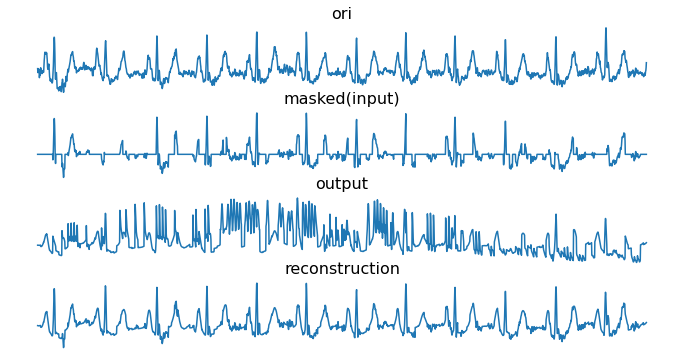

In [15]:
#models_mae_1d plot pl40 enc40dec20
import os
import numpy as np
import torch
from models import models_mae_1D
from config import config
import data_process
import matplotlib.pyplot as plt
def show_image(signal, title=''):
    # image is [H, W, 3]
    signal = signal.detach().numpy()
    plt.plot(signal[0])
    plt.title(title, fontsize=16)
    plt.axis('off')
    return
def run_one_signal(img, model):
    x = torch.tensor(img)

    # make it a batch-like
    x = x.unsqueeze(dim=0)
    print('input signal :{}'.format(x.shape))
    # run MAE
    loss, y, mask = model(x.float(), mask_ratio=0.75)
    y = model.unpatchify(y)
    print('output signal :{}'.format(y.shape))
    # visualize the mask
    mask = mask.detach()
    
    mask = mask.unsqueeze(-1).repeat(1, 1, model.patch_embed.patch_length)  # (N, H*W, p*p*3)
    mask = model.unpatchify(mask)  # 1 is removing, 0 is keeping

    # masked image
    im_masked = x * (1 - mask)
    # MAE reconstruction pasted with visible patches
    im_paste = x * (1 - mask) + y * mask

    # make the plt figure larger
    plt.rcParams['figure.figsize'] = [12, 6]
    plt.subplot(4, 1, 1)
    show_image(x[0],'ori')
    plt.subplot(4, 1, 2)
    show_image(im_masked[0],'masked(input)')
    plt.subplot(4, 1, 3)
    show_image(y[0],'output')
    plt.subplot(4, 1, 4)
    show_image(im_paste[0],'reconstruction')
    # plt.subplot(1, 4, 2)
    # show_image(im_masked[0], "masked")

    # plt.subplot(1, 4, 3)
    # show_image(y[0], "reconstruction")

    # plt.subplot(1, 4, 4)
    # show_image(im_paste[0], "reconstruction + visible")

    # plt.show()
device = 'cpu'
model_1D = models_mae_1D.mae_vit_signal_patch12_mask50()
model_1D.to(device)
# state = torch.load('ckpt_pretrain/mae_vit_signal_patch12_enc40_dec20d8b_1D_202208020818_v2_pl48_lr0.001_st16to24_bsz256_datastand_True_random0.75_fs240Hz_linearpos/best_w.pth',map_location='cpu')
state = torch.load(config.pre_train_ckpt,map_location='cpu')
model_1D.load_state_dict(state['state_dict'])
file_name = '1657599.xml.npy'
a = np.load(os.path.join(config.data_dir,file_name))
a = a[[1],:]
# a = (a - np.min(a))/(np.max(a)-np.min(a)) # 普通归一化时使用
a = (a-np.mean(a))/np.std(a) # z-score 归一化时使用
a = a.astype(np.float32)
a = data_process.resample(a[0],len(a[0]) * 240 // 500)
a = torch.tensor(a, dtype=torch.float32)
a = torch.unsqueeze(a,dim=0)
run_one_signal(a,model_1D)

In [3]:
# 分类
import torch
import os
import numpy as np
from config import config
import data_process
from models import ECG_mae_classifier
file_name = '1657599.xml.npy'
a = np.load(os.path.join(config.data_dir,file_name))
a = a[[1],:]
# a = (a - np.min(a))/(np.max(a)-np.min(a)) # 普通归一化时使用
a = (a-np.mean(a))/np.std(a) # z-score 归一化时使用
a = a.astype(np.float32)
a = data_process.resample(a[0],len(a[0]) * 240 // 500)
a = torch.tensor(a, dtype=torch.float32)
a = torch.unsqueeze(a,dim=0)
a = a.unsqueeze(0)
encoder = ECG_mae_classifier.EncoderMAE()
model = ECG_mae_classifier.ECG_mae_classifier(pre_train_model=encoder,class_n=4)
print(model(a)[0].shape)

torch.Size([1, 201, 40])


In [ ]:
# 分类标签提取 v1
import os
from re import L
tianchi_dir = 'D:\Data\天池\data'
label_path = os.path.join(tianchi_dir,'hf_round1_all_label.txt')
data_dir = os.path.join(tianchi_dir,'')
file = open(label_path,encoding='utf-8')
arrhythmia = ['心房颤动','窦性心律','窦性心动过缓','窦性心动过速','窦性心律不齐','房性早搏','室性早搏'] # v1
# arrhythmia = ['窦性心律','窦性心动过缓','窦性心动过速','窦性心律不齐','房性早搏','室性早搏','ST-T改变'] # v2

douxing = ['窦性心律','QRS低电压','临界ECG']

out_dir = 'D:\Data\天池\TC_classifier'

sum_N = 0
sum_NS = 0
sum_NQ = 0
sum_NB =0
with open(os.path.join(out_dir,'arrhythmia_v2.txt'),'w',encoding= 'utf-8') as arr_out:
    for a in arrhythmia:
        # if not a == 'ST-T改变':
        arr_out.write(a)
        arr_out.write('\n')
with open(os.path.join(out_dir,'all_label_v2.txt'),'w',encoding='utf-8') as label_out:
    for i in file.readlines():
        list = i.strip().split()
        arrhythmia_list = []
        if 'FEMALE' in list or 'MALE' in list:
            arrhythmia_list = list[3:]
        else:
            arrhythmia_list = list[1:]
        label = []
        for a in arrhythmia:
            if a in arrhythmia_list:
                label.append(a)
        if len(label)==0:
            continue
        if '窦性心律' in label:
            flag = 0
            for al in arrhythmia_list:
                if not al in douxing:
                    flag = 1
            if flag == 0:
                if sum_N<1000:
                    label_out.write(list[0].split('.')[0]+'.npy')
                    for l in label:
                        label_out.write(','+l)
                    sum_N+=1
            else:
                continue
        else:
            if '心房颤动' in label:
                label_out.write(list[0].split('.')[0]+'.npy')
                label_out.write(','+'心房颤动')
            elif '室性早搏' in label:
                label_out.write(list[0].split('.')[0]+'.npy')
                label_out.write(','+'室性早搏')
            elif '房性早搏' in label:
                label_out.write(list[0].split('.')[0]+'.npy')
                label_out.write(','+'房性早搏')
            else:
                if len(label) == 1:
                    if label[0] == '窦性心动过速' and sum_NQ<1000:
                        label_out.write(list[0].split('.')[0]+'.npy')
                        label_out.write(','+label[0])
                        sum_NQ+=1
                    elif label[0] == '窦性心动过缓' and sum_NS<1000:
                        label_out.write(list[0].split('.')[0]+'.npy')
                        label_out.write(','+label[0])
                        sum_NS+=1
                    elif label[0] == '窦性心律不齐' and sum_NB<1000:
                        label_out.write(list[0].split('.')[0]+'.npy')
                        label_out.write(','+label[0])
                        sum_NB+=1
                else:
                    continue
        label_out.write('\n')


In [19]:
# 分类标签提取 v2
import os
from re import L
from data_process import file2index,name2index
import numpy as np
tianchi_dir = 'D:\Data\天池\data'
label_path = os.path.join(tianchi_dir,'hf_round1_all_label.txt')
data_dir = os.path.join(tianchi_dir,'')
file = open(label_path,encoding='utf-8')
arrhythmia = ['窦性心律','窦性心动过缓','窦性心动过速','房性早搏','室性早搏','T波改变','ST-T改变'] # v2

douxing = ['窦性心律','QRS低电压','临界ECG']

out_dir = 'D:\Data\天池\TC_classifier'

sum_N = 0
sum_NS = 0
sum_NQ = 0
sum_NB =0
with open(os.path.join(out_dir,'arrhythmia_v2.txt'),'w',encoding= 'utf-8') as arr_out:
    for a in arrhythmia:
        arr_out.write(a)
        arr_out.write('\n')
name2idx = name2index(os.path.join(out_dir,'arrhythmia_v2.txt'))
idx2name = {idx: name for name, idx in name2idx.items()}

idx2cnt = np.zeros(len(name2idx),dtype=np.int32)
with open(os.path.join(out_dir,'all_label_v2.txt'),'w',encoding='utf-8') as label_out:
    for i in file.readlines():
        list = i.strip().split()
        arrhythmia_list = []
        if 'FEMALE' in list or 'MALE' in list:
            arrhythmia_list = list[3:]
        else:
            arrhythmia_list = list[1:]
        label = []
        for a in arrhythmia:
            if a in arrhythmia_list:
                label.append(a)
        if len(label)==0:
            continue
        if '窦性心律' in label:
            flag = 0
            for al in arrhythmia_list:
                if not al in douxing:
                    flag = 1
            if flag == 0:
                if sum_N<1000:
                    label_out.write(list[0].split('.')[0]+'.npy')
                    for l in label:
                        label_out.write(','+l)
                        label_out.write('\n')
                        idx2cnt[name2idx[l]]+=1
                    sum_N+=1
                continue
            # else:
            #     continue
        # else:
        if '室性早搏' in label:
            if idx2cnt[name2idx['室性早搏']]<1000:
                label_out.write(list[0].split('.')[0]+'.npy')
                label_out.write(','+'室性早搏')
                label_out.write('\n')
                idx2cnt[name2idx['室性早搏']]+=1
        elif '房性早搏' in label:
            if idx2cnt[name2idx['房性早搏']]<1000:
                label_out.write(list[0].split('.')[0]+'.npy')
                label_out.write(','+'房性早搏')
                label_out.write('\n')
                idx2cnt[name2idx['房性早搏']]+=1
        elif 'ST-T改变' in label:
            if idx2cnt[name2idx['ST-T改变']]<1000:
                label_out.write(list[0].split('.')[0]+'.npy')
                label_out.write(','+'ST-T改变')
                label_out.write('\n')
                idx2cnt[name2idx['ST-T改变']]+=1
        elif 'T波改变' in label:
            if idx2cnt[name2idx['T波改变']]<1000:
                label_out.write(list[0].split('.')[0]+'.npy')
                label_out.write(','+'T波改变')
                label_out.write('\n')
                idx2cnt[name2idx['T波改变']]+=1
        else:
            if len(label) == 1:
                if label[0] == '窦性心动过速' and sum_NQ<1000:
                    label_out.write(list[0].split('.')[0]+'.npy')
                    label_out.write(','+label[0])
                    label_out.write('\n')
                    idx2cnt[name2idx['窦性心动过速']]+=1
                    sum_NQ+=1
                elif label[0] == '窦性心动过缓' and sum_NS<1000:
                    label_out.write(list[0].split('.')[0]+'.npy')
                    label_out.write(','+label[0])
                    label_out.write('\n')
                    idx2cnt[name2idx['窦性心动过缓']]+=1
                    sum_NS+=1
            else:
                continue
        
with open(os.path.join(out_dir,'all_label_cnt_v2.txt'),'w',encoding='utf-8') as cnt_out:
    for idx in range(len(idx2cnt)):
        cnt_out.write(str(idx2name[idx]))
        cnt_out.write(',')
        cnt_out.write(str(idx2cnt[idx]))
        cnt_out.write('\n')
        print('label:{},cnt:{}'.format(idx2name[idx],idx2cnt[idx]))


KeyError: '心房颤动'

In [21]:
# 分类标签提取 v3
import os
from re import L
from data_process import file2index,name2index
import numpy as np
tianchi_dir = 'D:\Data\天池\data'
label_path = os.path.join(tianchi_dir,'hf_round1_all_label.txt')
data_dir = os.path.join(tianchi_dir,'')
file = open(label_path,encoding='utf-8')
arrhythmia = ['心房颤动','窦性心律','窦性心动过缓','窦性心动过速','房性早搏','室性早搏']  # v3

douxing = ['窦性心律','QRS低电压','临界ECG']

out_dir = 'D:\Data\天池\TC_classifier'

sum_N = 0
sum_NS = 0
sum_NQ = 0
sum_NB =0
with open(os.path.join(out_dir,'arrhythmia_v3.txt'),'w',encoding= 'utf-8') as arr_out:
    for a in arrhythmia:
        arr_out.write(a)
        arr_out.write('\n')
name2idx = name2index(os.path.join(out_dir,'arrhythmia_v3.txt'))
idx2name = {idx: name for name, idx in name2idx.items()}

idx2cnt = np.zeros(len(name2idx),dtype=np.int32)
with open(os.path.join(out_dir,'all_label_v3.txt'),'w',encoding='utf-8') as label_out:
    for i in file.readlines():
        list = i.strip().split()
        arrhythmia_list = []
        if 'FEMALE' in list or 'MALE' in list:
            arrhythmia_list = list[3:]
        else:
            arrhythmia_list = list[1:]
        label = []
        for a in arrhythmia:
            if a in arrhythmia_list:
                label.append(a)
        if len(label)==0:
            continue
        if '窦性心律' in label:
            flag = 0
            for al in arrhythmia_list:
                if not al in douxing:
                    flag = 1
            if flag == 0:
                if sum_N<1000:
                    label_out.write(list[0].split('.')[0]+'.npy')
                    for l in label:
                        label_out.write(','+l)
                        label_out.write('\n')
                        idx2cnt[name2idx[l]]+=1
                    sum_N+=1
                continue
            # else:
            #     continue
        # else:
        if '室性早搏' in label:
            if idx2cnt[name2idx['室性早搏']]<1000:
                label_out.write(list[0].split('.')[0]+'.npy')
                label_out.write(','+'室性早搏')
                label_out.write('\n')
                idx2cnt[name2idx['室性早搏']]+=1
        elif '房性早搏' in label:
            if idx2cnt[name2idx['房性早搏']]<1000:
                label_out.write(list[0].split('.')[0]+'.npy')
                label_out.write(','+'房性早搏')
                label_out.write('\n')
                idx2cnt[name2idx['房性早搏']]+=1
        elif '心房颤动' in label:
            if idx2cnt[name2idx['心房颤动']]<1000:
                label_out.write(list[0].split('.')[0]+'.npy')
                label_out.write(','+'心房颤动')
                label_out.write('\n')
                idx2cnt[name2idx['心房颤动']]+=1
        else:
            if len(label) == 1:
                if label[0] == '窦性心动过速' and sum_NQ<1000:
                    label_out.write(list[0].split('.')[0]+'.npy')
                    label_out.write(','+label[0])
                    label_out.write('\n')
                    idx2cnt[name2idx['窦性心动过速']]+=1
                    sum_NQ+=1
                elif label[0] == '窦性心动过缓' and sum_NS<1000:
                    label_out.write(list[0].split('.')[0]+'.npy')
                    label_out.write(','+label[0])
                    label_out.write('\n')
                    idx2cnt[name2idx['窦性心动过缓']]+=1
                    sum_NS+=1
            else:
                continue
        
with open(os.path.join(out_dir,'all_label_cnt_v3.txt'),'w',encoding='utf-8') as cnt_out:
    for idx in range(len(idx2cnt)):
        cnt_out.write(str(idx2name[idx]))
        cnt_out.write(',')
        cnt_out.write(str(idx2cnt[idx]))
        cnt_out.write('\n')
        print('label:{},cnt:{}'.format(idx2name[idx],idx2cnt[idx]))


label:心房颤动,cnt:1000
label:窦性心律,cnt:1000
label:窦性心动过缓,cnt:1000
label:窦性心动过速,cnt:1000
label:房性早搏,cnt:1000
label:室性早搏,cnt:1000


In [3]:
# 分类标签提取 v4 房颤二分类
import os
from re import L
from data_process import file2index,name2index
import numpy as np
tianchi_dir = 'D:\Data\天池\data'
label_path = os.path.join(tianchi_dir,'hf_round1_all_label.txt')
data_dir = os.path.join(tianchi_dir,'')
file = open(label_path,encoding='utf-8')
arrhythmia = ['心房颤动','窦性心律']  # v3

douxing = ['窦性心律','QRS低电压','临界ECG','窦性心动过速','窦性心动过缓','窦性心律不齐']

out_dir = 'D:\Data\天池\TC_classifier'

sum_N = 0
sum_NS = 0
sum_NQ = 0
sum_NB =0
with open(os.path.join(out_dir,'arrhythmia_v4.txt'),'w',encoding= 'utf-8') as arr_out:
    for a in arrhythmia:
        arr_out.write(a)
        arr_out.write('\n')
name2idx = name2index(os.path.join(out_dir,'arrhythmia_v4.txt'))
idx2name = {idx: name for name, idx in name2idx.items()}

idx2cnt = np.zeros(len(name2idx),dtype=np.int32)
max_num = 1200
with open(os.path.join(out_dir,'all_label_v4.txt'),'w',encoding='utf-8') as label_out:
    for i in file.readlines():
        list = i.strip().split()
        arrhythmia_list = []
        if 'FEMALE' in list or 'MALE' in list:
            arrhythmia_list = list[3:]
        else:
            arrhythmia_list = list[1:]
        label = []
        for a in arrhythmia:
            if a in arrhythmia_list:
                label.append(a)
        if len(label)==0:
            continue
        if '窦性心律' in label:
            flag = 0
            for al in arrhythmia_list:
                if not al in douxing:
                    flag = 1
            if flag == 0:
                if sum_N<max_num:
                    label_out.write(list[0].split('.')[0]+'.npy')
                    for l in label:
                        label_out.write(','+l)
                        label_out.write('\n')
                        idx2cnt[name2idx[l]]+=1
                    sum_N+=1
                else:
                    continue
            else:
                continue
        elif '心房颤动' in label:
            if idx2cnt[name2idx['心房颤动']]<max_num:
                label_out.write(list[0].split('.')[0]+'.npy')
                label_out.write(','+'心房颤动')
                label_out.write('\n')
                idx2cnt[name2idx['心房颤动']]+=1
       
    
with open(os.path.join(out_dir,'all_label_cnt_v4.txt'),'w',encoding='utf-8') as cnt_out:
    for idx in range(len(idx2cnt)):
        cnt_out.write(str(idx2name[idx]))
        cnt_out.write(',')
        cnt_out.write(str(idx2cnt[idx]))
        cnt_out.write('\n')
        print('label:{},cnt:{}'.format(idx2name[idx],idx2cnt[idx]))


label:心房颤动,cnt:1200
label:窦性心律,cnt:1200


In [51]:
# 分类标签提取 v4 房早二分类
import os
from re import L
from data_process import file2index,name2index
import numpy as np
tianchi_dir = 'D:\Data\天池\data'
label_path = os.path.join(tianchi_dir,'hf_round1_all_label.txt')
data_dir = os.path.join(tianchi_dir,'')
file = open(label_path,encoding='utf-8')
arrhythmia = ['房性早搏','窦性心律']  # v3

douxing = ['窦性心律','QRS低电压','临界ECG','窦性心动过速','窦性心动过缓','窦性心律不齐']

out_dir = 'D:\Data\天池\TC_classifier'

sum_N = 0
sum_NS = 0
sum_NQ = 0
sum_NB =0
with open(os.path.join(out_dir,'arrhythmia_v5.txt'),'w',encoding= 'utf-8') as arr_out:
    for a in arrhythmia:
        arr_out.write(a)
        arr_out.write('\n')
name2idx = name2index(os.path.join(out_dir,'arrhythmia_v5.txt'))
idx2name = {idx: name for name, idx in name2idx.items()}

idx2cnt = np.zeros(len(name2idx),dtype=np.int32)
max_num = 1200
with open(os.path.join(out_dir,'all_label_v5.txt'),'w',encoding='utf-8') as label_out:
    for i in file.readlines():
        list = i.strip().split()
        arrhythmia_list = []
        if 'FEMALE' in list or 'MALE' in list:
            arrhythmia_list = list[3:]
        else:
            arrhythmia_list = list[1:]
        label = []
        for a in arrhythmia:
            if a in arrhythmia_list:
                label.append(a)
        if len(label)==0:
            continue
        if '房性早搏' in label:
            if idx2cnt[name2idx['房性早搏']]<max_num:
                label_out.write(list[0].split('.')[0]+'.npy')
                label_out.write(','+'房性早搏')
                label_out.write('\n')
                idx2cnt[name2idx['房性早搏']]+=1
        elif '窦性心律' in label:
            flag = 0
            for al in arrhythmia_list:
                if not al in douxing:
                    flag = 1
            if flag == 0:
                if sum_N<max_num:
                    label_out.write(list[0].split('.')[0]+'.npy')
                    for l in label:
                        label_out.write(','+l)
                        label_out.write('\n')
                        idx2cnt[name2idx[l]]+=1
                    sum_N+=1
                else:
                    continue
            else:
                continue
        
       
    
with open(os.path.join(out_dir,'all_label_cnt_v5.txt'),'w',encoding='utf-8') as cnt_out:
    for idx in range(len(idx2cnt)):
        cnt_out.write(str(idx2name[idx]))
        cnt_out.write(',')
        cnt_out.write(str(idx2cnt[idx]))
        cnt_out.write('\n')
        print('label:{},cnt:{}'.format(idx2name[idx],idx2cnt[idx]))


label:房性早搏,cnt:1200
label:窦性心律,cnt:1200


In [53]:
# #分类 划分数据集
from fileinput import close
import os
from random import randint
from sklearn import model_selection
from data_process import name2index,file2index
import numpy as np
def save_label(file2idx,list,path_label,path_data):
    with open(path_label,'w',encoding='utf-8') as fout1:
        with open(path_data,'w',encoding = 'utf-8') as fout2:
            for data in list:
                fout2.write(data)
                fout2.write('\n')
                fout1.write(data)
                fout1.write(','+idx2name[file2idx[data][0]])
                fout1.write('\n')
version = 'v5'
name2idx = name2index('D://Data//天池//TC_classifier//arrhythmia_{}.txt'.format(version))       
idx2name = {idx: name for name, idx in name2idx.items()}
# label_path = 'D://Data/天池/TC_classifier/all_label_{}.txt'.format(version)
# train_label_path = 'D://Data/天池/TC_classifier/trainval_label_{}.txt'.format(version)
# train_data_path = 'D://Data/天池/TC_classifier/trainval_data_{}.txt'.format(version)
# val_label_path = 'D://Data/天池/TC_classifier/test_label_{}.txt'.format(version)
# val_data_path = 'D://Data/天池/TC_classifier/test_data_{}.txt'.format(version)


label_path = 'D://Data/天池/TC_classifier/trainval_label_{}.txt'.format(version)
train_label_path = 'D://Data/天池/TC_classifier/train_label_{}.txt'.format(version)
train_data_path = 'D://Data/天池/TC_classifier/train_data_{}.txt'.format(version)
val_label_path = 'D://Data/天池/TC_classifier/val_label_{}.txt'.format(version)
val_data_path = 'D://Data/天池/TC_classifier/val_data_{}.txt'.format(version)



file2idx = file2index(label_path,name2idx)


# 统计类别
cc = [0] * len(name2idx)
arraythmia_dict = [[],[],[],[],[],[],[]]


for k,v in file2idx.items():
    cc[v[0]] += 1
for idx,num in enumerate(cc):
    print("{}共{}".format(idx2name[idx],num))
for k,v in file2idx.items():
    arraythmia_dict[v[0]].append(k)

train = []
val = []

for idx,num in enumerate(cc):
    rand_indices = np.random.rand(num).argsort(-1)
    for i in rand_indices[:int(num*0.8)]:
        train.append(arraythmia_dict[idx][i])
    for i in rand_indices[int(num*0.8):]:
        val.append(arraythmia_dict[idx][i])
save_label(file2idx,train,train_label_path,train_data_path)
save_label(file2idx,val,val_label_path,val_data_path)



房性早搏共960
窦性心律共960


In [56]:
# 分类数据整理
from fileinput import filename
import os
import numpy as np
import matplotlib.pyplot as plt
from data_process import BSW,file2index,name2index, resample
tianchi_dir = 'D:\Data\天池\data'
data_dir = os.path.join(tianchi_dir,'all')
name2idx = name2index('D://Data//天池//TC_classifier//arrhythmia_v5.txt')  
label_path = 'D://Data/天池/TC_classifier/all_label_v5.txt'   
file2idx = file2index(label_path,name2idx)
out_dir = 'D://Data/天池/TC_classifier/all_data'
flag = 0
for k,_ in file2idx.items():
    
    
    file_name = os.path.join(out_dir,k)
    if not os.path.exists(file_name):
        flag = 1
        signal = []
        file = open(os.path.join(data_dir,k.split('.')[0]+'.txt'),encoding='utf-8')
        for i in file.readlines():
            signal.append(i.split())
        ecg = np.array(signal[1:],dtype=np.float32)
        II = ecg[:,1]
        II = BSW(II,fs=500)
        II = resample(II,2400)
        
        np.save(file_name,II)
if flag ==1:
    print("新增了数据")

In [5]:
# 分类模型

import torch
import torch.nn as nn
from timm.models.layers import trunc_normal_
from functools import partial
from dataset import classifier_dataset
from config import config
from torch.utils.data import DataLoader

from data_process import name2index,file2index
from models.ECG_mae_classifier import ECG_mae_classifier,EncoderMAE
import models.resnet as resnet

# encoder = EncoderMAE(global_pool=True,new_norm_layer=partial(nn.LayerNorm, eps=1e-6))
# model = ECG_mae_classifier(pre_train_model=encoder,class_n=config.classifier_class_n)
model = resnet.resnet34_lead2()
# print(encoder.state_dict)
train_dataset = classifier_dataset(config.classifier_train_label,config.classifier_train_data)
train_dataloader = DataLoader(train_dataset,batch_size=config.batch_size,shuffle=False,num_workers=6 if config.onserver else 1,drop_last=True,pin_memory=True)
criterion = nn.CrossEntropyLoss()
criterion = nn.BCEWithLogitsLoss()
# load state
# checkpoint = torch.load(config.pre_train_ckpt,map_location='cpu')['state_dict']
# # encoder_dict = encoder.state_dict()
# # checkpoint_encoder_dict = {k:v for k,v in checkpoint.items() if k in encoder_dict}
# # encoder.load_state_dict(checkpoint_encoder_dict)
# msg = model.encoder.load_state_dict(checkpoint,strict=False)
# print(msg.missing_keys)
# a = trunc_normal_(model.fc.weight,std=0.01)
# # for _,p in model.encoder.named_parameters():
# #     p.requires_grad = False
# # for p in model.named_parameters():
# #     print(p[0])
# #     print(p[1].requires_grad)

for inputs,target in train_dataloader:
    target = target.squeeze(-1)
    print('输入：{}'.format(inputs.shape))
    print('标签：{}'.format(target.shape))
    print('target:{}'.format(target))
    y_pred = model(inputs)
    
    # y_pred = y_pred.softmax(-1).argmax(-1)
    print('输出：{}'.format(y_pred.shape))
    loss = criterion(y_pred,target.float())
    print(loss)
    break

输入：torch.Size([64, 1, 2400])
标签：torch.Size([64, 2])
target:tensor([[1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0

房性早搏


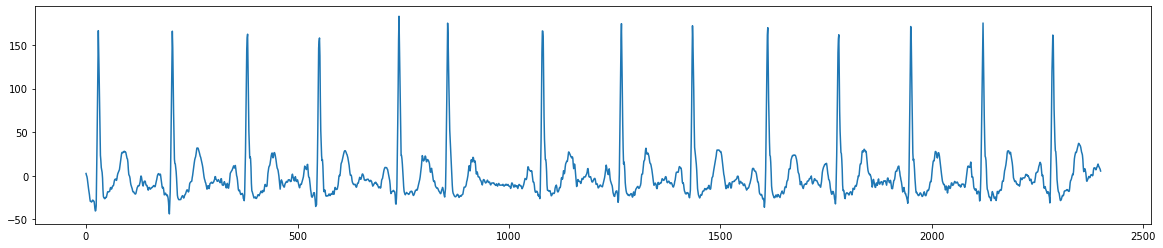

In [1]:
#分类数据画图检验
# 分类数据整理
import os
import numpy as np
import matplotlib.pyplot as plt
from data_process import BSW,file2index,name2index, resample
import random
tianchi_dir = 'D:\Data\天池\data'
data_dir = os.path.join(tianchi_dir,'all')
name2idx = name2index('D://Data//天池//TC_classifier//arrhythmia_v5.txt')  
idx2name = {idx: name for name, idx in name2idx.items()}
label_path = 'D://Data/天池/TC_classifier/all_label_v5.txt'   
file2idx = file2index(label_path,name2idx)
out_dir = 'D://Data/天池/TC_classifier/all_data'
k = list(file2idx.keys())
v = list(file2idx.values())
a = random.randint(0,len(k))

data = np.load(os.path.join(out_dir,k[a]))
print(idx2name[v[a][0]])
plt.figure(figsize=(20,4))
plt.plot(data)

        


In [34]:
# ludb 新数据
#U-net数据添加mit
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import scipy.signal as signal
#用wfdb提取ludb数据
import wfdb
def BSW(data,band_hz = 0.5,fs=240):
    wn1 = 2 * band_hz / fs # 只截取5hz以上的数据
    b, a = signal.butter(1, wn1, btype='high')
    filteddata = signal.filtfilt(b, a, data)
    return filteddata
def resample(sig, target_point_num=None):
    '''
    对原始信号进行重采样
    :param sig: 原始信号
    :param target_point_num:目标型号点数
    :return: 重采样的信号
    '''
    sig = signal.resample(sig, target_point_num) if target_point_num else sig
    return sig
ludb_path = 'D://Data/LUDB/physionet.org/files/ludb/1.0.0'
output_dir = 'D://Data/U-net数据/240Hz/all/baselinedriftV2_10s/alldata/'
data = '189'

for data_index in range(1,201):
    data_name = str(data_index)
    record = wfdb.rdrecord(os.path.join(ludb_path,data_name),physical=False,channels=[1])
    d_signal = record.d_signal
    x = np.reshape(d_signal,(5000,))
    
    signal_annotation = wfdb.rdann(os.path.join(ludb_path,data_name),"atr_ii")
    p = np.zeros(2400,dtype=np.int32)
    n = np.zeros(2400,dtype=np.int32)
    t = np.zeros(2400,dtype=np.int32)
    b = np.zeros(2400,dtype=np.int32)
    
    sample = signal_annotation.sample

    for i in range(int(len(signal_annotation.symbol)/3)):

        start = sample[3*i]
        end = sample[3*i+2]
        symbol = signal_annotation.symbol[1+3*i]

        if symbol == 'N':
            for index in range(int(start*240/500),int(end*240/500)):
                n[index] = 1
        elif symbol == 't':
            for index in range(int(start*240/500),int(end*240/500)):
                t[index] = 1
        elif symbol == 'p':
            for index in range(int(start*240/500),int(end*240/500)):
                p[index] = 1
        pass
    for i in range(len(p)):
        if p[i] == 0 and t[i] == 0 and n[i] == 0:
            b[i] = 1
    
    x = resample(x,len(x) * 240 // 500)
    x = BSW(x)
    

    new_data = np.vstack((x,p,n,t,b))
    save_name = 'ludb'+data_name
    np.save(os.path.join(output_dir,save_name),new_data)
    
    
    


freeze
diff:[0. 0. 0. ... 0. 0. 0.]
error:起点和结束点数目不匹配
diff:[0. 0. 0. ... 0. 0. 0.]
p_on TP:9,TN:9,FP:1,FN:1,mean_error:[9.55555556]
[[ 282]
 [ 524]
 [ 766]
 [1003]
 [1225]
 [1458]
 [1690]
 [1917]
 [2143]
 [2378]]
[[ 271]
 [ 512]
 [ 753]
 [ 993]
 [1219]
 [1448]
 [1679]
 [1912]
 [2135]
 [2306]]


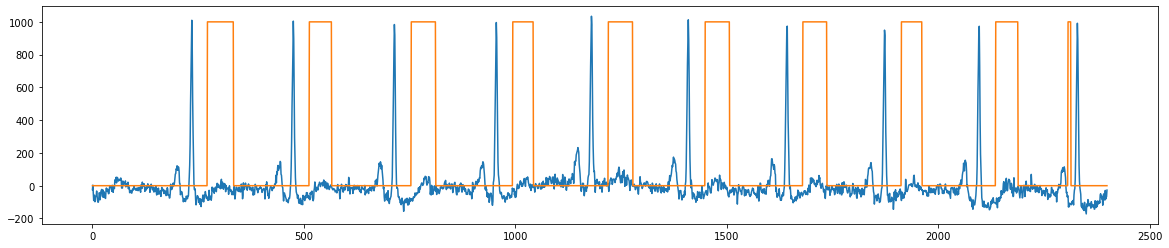

In [10]:
# ludb测试方法
from sys import ps1
import numpy as np
import os
import matplotlib.pyplot as plt
from data_process import my_output_sliding_voting,output_sliding_voting
import torch
from models.ECG_mae_segmentation import ECG_mae_segmentation_U_12,EncoderMAE
import torch.nn.functional as F
def segment2onoff(x):
    on = []
    off = []
    diff = np.diff(x)
    print('diff:{}'.format(diff))
    on = np.argwhere(diff == 1)
    off = np.argwhere(diff == -1)
    if not len(on) == len (off):
        print('error:起点和结束点数目不匹配')
        return on,off
    return on,off
def onoffcount(pred_list,true_list):
    tolerate = int(240 * 0.15)
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    mean_error = 0
    for pred in pred_list:
        right = 0
        for true in true_list:
            if true-tolerate < pred < true+tolerate:
                right = 1
                mean_error += abs(true-pred)
                TP += 1
                break
        if right == 0:
            FP +=1
    for true in true_list:
        right = 0
        for pred in pred_list:
            if true-tolerate < pred < true+tolerate:
                right = 1
                TN += 1
                break
        if right == 0:
            FN += 1
    return TP,TN,FP,FN,mean_error/TP
pre_train_model = EncoderMAE()
pre_train_model.eval()
model = ECG_mae_segmentation_U_12(pre_train_model=pre_train_model,class_n=4)
model.eval()

state  = torch.load(os.path.join('ckpt\mae_vit_signal_patch12_Nopre1_UTrans_12_202208250613_v2_tianchilr0.001_ReduceLROnPlateau_bsz64_datastand_True_freeze_False_240Hz_dice_loss_withoutpre','best_w.pth'),map_location='cpu')
model.load_state_dict(state['state_dict'])
data_path = '/home/ECG_AI/N_MAE_ECG/baselinedriftV2_10s/alldata'

file_name1 = 'ccdd794.npy'
data1 = np.load(os.path.join(data_path,file_name1))
p_true = output_sliding_voting(data1[1],window = 9)
r_true = output_sliding_voting(data1[2],window = 9)
t_true = output_sliding_voting(data1[3],window = 9)
x = data1[0]
x = (x - np.mean(x))/np.std(x)
lenx = len(x)
x = torch.tensor(x,dtype = torch.float32)
x = torch.unsqueeze(x,0)
x = torch.unsqueeze(x,0)
with torch.no_grad():
    pred = model(x)
out_pred = F.softmax(pred, 1).detach().cpu().numpy().argmax(axis=1)
out_pred = np.reshape(out_pred,lenx)

output = output_sliding_voting(out_pred,9)
pred = np.zeros((4,lenx),dtype = np.float32)
for idx,i in enumerate(output):
    pred[int(i),idx] =1

t_on_true,t_off_true = segment2onoff(t_true)
t_on_pred,t_off_pred = segment2onoff(pred[2])
TP,TN,FP,FN,mean_error = onoffcount(pred_list=t_on_pred,true_list=t_on_true)
print('p_on TP:{},TN:{},FP:{},FN:{},mean_error:{}'.format(TP,TN,FP,FN,mean_error))
print(t_on_true)
print(t_off_pred)
plt.figure(figsize=(20,4))
plt.plot(data1[0])
plt.plot(pred[2]*1000)


In [1]:
#分割模型调整
from config import config
import torch
import numpy as np
from models.mae_1D_linearmask import MAE_linearmask
from models.ECG_mae_segmentation import ECG_mae_segmentation_U_48,EncoderMAE
import os
import data_process
import matplotlib.pyplot as plt
from data_process import name2index,file2index,file2list,list2file
pre_train_model = EncoderMAE(patch_size=48,embed_dim=160)
model = ECG_mae_segmentation_U_48(pre_train_model,4)
file_name = '1657599.xml.npy'
a = np.load(os.path.join(config.data_dir,file_name))
a = a[[1],:]
a = (a-np.mean(a))/np.std(a) # z-score 归一化时使用
a = a.astype(np.float32)
a = data_process.resample(a[0],len(a[0]) * 240 // 500)
a = torch.tensor(a, dtype=torch.float32)
a = torch.unsqueeze(a,dim=0)
a = torch.unsqueeze(a,dim=0)
print(model(a).shape)

freeze
torch.Size([1, 4, 2400])
